# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

I'm going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation
7. Sharing the results

## 1. Problem definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleveland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downsloping: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# Import all tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from SciKit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [2]:
df = pd.read_csv('data/heart-disease.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

## Data Exploration (exploratory data analysis or EDA)

Let's find out more about the data and become kind of a subject matter expert on the dataset we're working with answering the following questions:

1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of our data?

In [3]:
df.shape

(303, 14)

In [4]:
# Let's find out how many of each class there
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

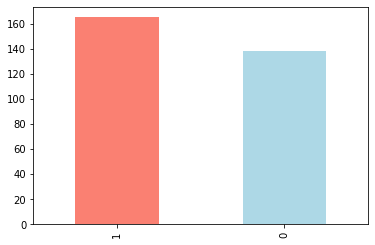

In [5]:
df['target'].value_counts().plot(kind='bar',
                                 color=['salmon', 'lightblue']);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

### Heart Disease Frequency according to Sex

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex      0    1
target         
0       24  114
1       72   93

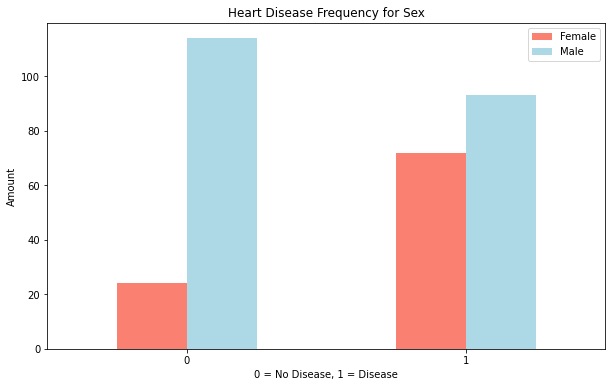

In [11]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10, 6),
                                    color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease

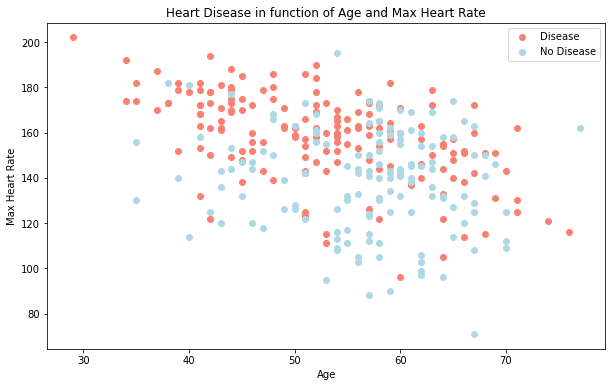

In [12]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')
# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')
# Add some helpful info
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

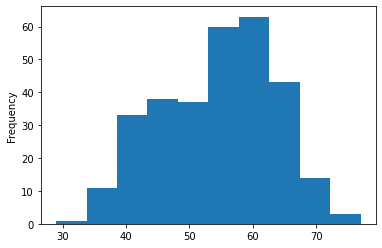

In [13]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [14]:
pd.crosstab(df.cp, df.target)

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

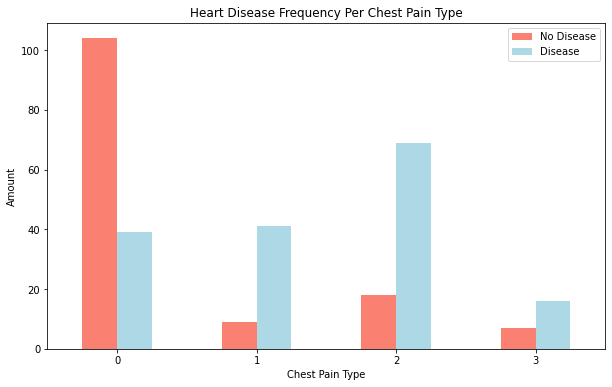

In [15]:
# Make the crosstab more visual

pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10, 6),
                                   color=['salmon', 'lightblue'])

plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

### Correlation matrix

In [16]:
# Make a correlation matrix
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

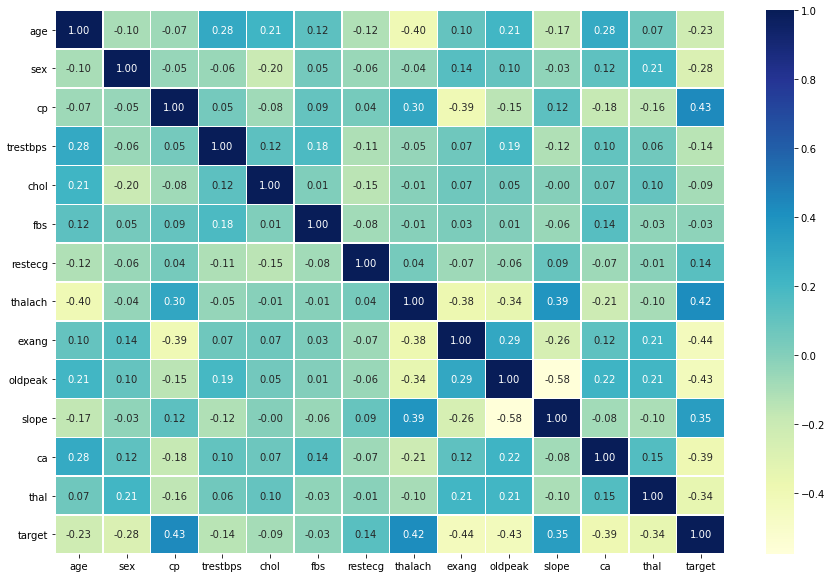

In [17]:
# Let's make our correlation matrix prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu');

## 5. Modelling

In [18]:
# Split data into features and labels
X = df.drop('target', axis=1)
y = df.target

In [19]:
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [21]:
# Split data into train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

We're going to try three different machine learning models:
1. Logistic Regression
2. KNeighbors Classifier
3. Random Forest Classifier

In [23]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

In [24]:
# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given ML models.
    models: a disc of different models
    X_train: train data (no labels)
    X_test: test data (no labels)
    y_train: train labels
    y_test: test labels
    '''
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = round(model.score(X_test, y_test), 2)
    return model_scores

In [25]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

C:\Users\user\Desktop\projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
model_scores

{'Logistic Regression': 0.89, 'KNN': 0.69, 'Random Forest': 0.84}

### Model Comparison

In [27]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare

Logistic Regression   KNN  Random Forest
accuracy                 0.89  0.69           0.84

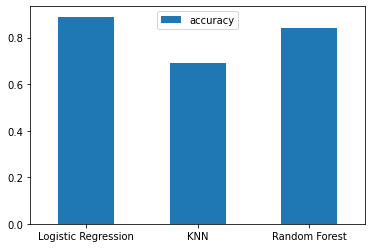

In [28]:
model_compare.T.plot.bar()
plt.xticks(rotation=0);

Now we've got a baseline model and we know model's first predictions aren't always what we shoud base our next steps off. What should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [29]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [30]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [31]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


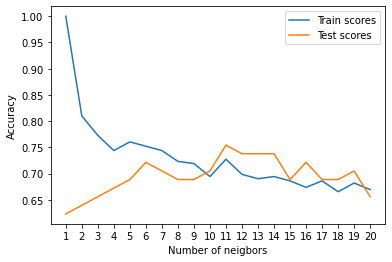

In [32]:
plt.plot(neighbors, train_scores, label='Train scores')
plt.plot(neighbors, test_scores, label='Test scores')
plt.xticks(neighbors)
plt.xlabel('Number of neigbors')
plt.ylabel('Accuracy')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%');

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [33]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

Now we've got hyperparameter grids for each of our models, let's tune them using RandomizedSearchCV...

In [34]:
# Tune LogisticRegression
np.random.seed(42)

#Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [36]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [37]:
# Tune RandomForestClassifier
np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [38]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [39]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

In [40]:
model_scores

{'Logistic Regression': 0.89, 'KNN': 0.69, 'Random Forest': 0.84}

## Hyperparameter tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV ...


In [41]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(n_jobs=-1),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\user\Desktop\projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\user\Desktop\projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\user\Desktop\projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\user\Desktop\projects\heart-disease-project\env\lib\site-package

C:\Users\user\Desktop\projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\user\Desktop\projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\user\Desktop\projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\user\Desktop\projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have

C:\Users\user\Desktop\projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\user\Desktop\projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\user\Desktop\projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\user\Desktop\projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have

C:\Users\user\Desktop\projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\user\Desktop\projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\user\Desktop\projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\user\Desktop\projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have

C:\Users\user\Desktop\projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\user\Desktop\projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\user\Desktop\projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
C:\Users\user\Desktop\projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have

In [42]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [43]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [44]:
model_scores

{'Logistic Regression': 0.89, 'KNN': 0.69, 'Random Forest': 0.84}

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation is used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [45]:
# Make predictions with trained model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

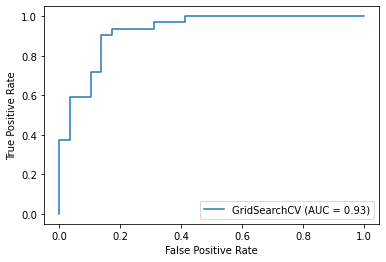

In [46]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [47]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


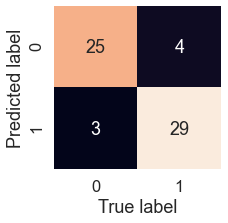

In [48]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    '''
    Plots a nice looking confusion matrix using Seaborn's heatmap
    '''
    
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
plot_conf_mat(y_test, y_preds);

Now we've got a ROC curve, an AUC metric, and a confusion metrix. Let's get a classification report as well as cross-validated precision, recall and f1-score.

In [49]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [50]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [51]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

In [52]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [53]:
# Cross-validates precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [54]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [55]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

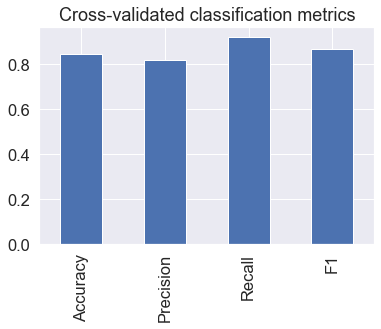

In [56]:
# Visualize our cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1': cv_f1},
                           index=[0])
cv_metrics.T.plot.bar(title='Cross-validated classification metrics',
                      legend=False);

### Feature Importance

Feature importance is another as asking, 'which features contributed most to the outcomes of the model and how they contributed'

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for model feature importance.

Let's find the feature importance for our LogisticRegression model.

In [57]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [58]:
# Fit an instance of LogisticRegression with best parameters

clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [59]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044655,  0.66067042, -0.01156993, -0.00166374,
         0.04386109,  0.31275847,  0.02459361, -0.60413083, -0.56862804,
         0.4505163 , -0.63609898, -0.67663378]])

In [60]:
list(clf.coef_[0])

[0.0031672809701328098,
 -0.8604465542018854,
 0.6606704161071124,
 -0.011569931839584581,
 -0.0016637442846940298,
 0.043861090099753856,
 0.3127584688139112,
 0.024593614036076978,
 -0.6041308274033194,
 -0.5686280446250761,
 0.45051629703183155,
 -0.6360989766185763,
 -0.6766337834775279]

In [61]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672809701328098,
 'sex': -0.8604465542018854,
 'cp': 0.6606704161071124,
 'trestbps': -0.011569931839584581,
 'chol': -0.0016637442846940298,
 'fbs': 0.043861090099753856,
 'restecg': 0.3127584688139112,
 'thalach': 0.024593614036076978,
 'exang': -0.6041308274033194,
 'oldpeak': -0.5686280446250761,
 'slope': 0.45051629703183155,
 'ca': -0.6360989766185763,
 'thal': -0.6766337834775279}

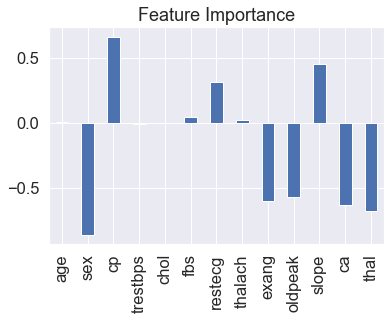

In [62]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

`sex` attribute has a strong negative correlation in realtion to the target variable, `slope` attribute has a positive correlation with the target variable

In [63]:
pd.crosstab(df.sex, df.target)

target    0   1
sex            
0        24  72
1       114  93

In [64]:
pd.crosstab(df.slope, df.target)

target   0    1
slope          
0       12    9
1       91   49
2       35  107

### Experimenting with dropping some attributes

As wee see, attrubitures like `age`, `trestbps`, `chol` have correlation with the taget variable close to 0. Let's try to drop these attributes from the train and test sets and check the model score.

In [65]:
X_train_dropped = X_train.drop(['age', 'trestbps', 'chol'], axis=1)
X_test_dropped = X_test.drop(['age', 'trestbps', 'chol'], axis=1)

In [66]:
X_train_dropped.shape, X_test_dropped.shape, y_train.shape, y_test.shape

((242, 10), (61, 10), (242,), (61,))

In [67]:
# Initiate and fit a LogisticRegression model

clf_d = LogisticRegression(C=0.20433597178569418,
                           solver='liblinear')

clf_d.fit(X_train_dropped, y_train)
clf_d.score(X_test_dropped, y_test)

0.8852459016393442

In [68]:
clf.score(X_test, y_test)

0.8852459016393442

Conclusion: it's clear that dropping these columns didn't affect the score result

## 6. Experimentation

If we haven't hit your evaluation metric yet (and we haven't), we have to ask the following questions:

* Could we collect more data?
* Could we try a better model? Like CatBoost or XGBoost?
* Could we improve the current models? (beyond what we've done)

Unfortunately, there are no sources and resources to expand the dataset. Let's try to use a different classifier.

## 6.1. Experimentation with CatBoostClassifier

According to data description, all the variables are numeric. But we understand that some variables such as `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, and `thal` are actually categorical but expressed with numbers. So, we're going to treat them as categorical features while using CatBoost.

### Import packages

In [69]:
from catboost import *
from catboost import CatBoostClassifier

### Check the dataset

In [70]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Preparing the data

In [72]:
# Set the list of categorical variables
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [73]:
# Label values extraction
X = df.drop('target', axis=1)
y = df.target

In [74]:
# Looking at label balance in a dataset
print('Labels = {}'.format(set(y)))
print('Zero count = {}, One count = {}'.format(len(y) - sum(y), sum(y)))

Labels = {0, 1}
Zero count = 138, One count = 165


We see that classes are quite balanced, but not ideally balanced, so when fitting the model using cross validation we can try to set stratified parameter to True to additionally balance our class samples in validation folds.

### Let's split tha dataset into train and test sets

In [75]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

### Instantiate and train a baseline model with the default hyperparameters

The default objective function for binary classification (targets are 0 and 1) in CatBoost is `Logloss`. The default number of `iterations` (aka number of trees constructed) is 1000. The default `lerning_rate` is chosen automatically. We can plot the process of model training and `Logloss` calculation setting `plot` parameter to True. 

In [76]:
np.random.seed(42)
model = CatBoostClassifier().fit(X_train, y_train,
                                 cat_features=cat_features,
                                 eval_set=(X_test, y_test),
                                 verbose=50,
                                 plot=True)

Learning rate set to 0.022321
0:	learn: 0.6789815	test: 0.6795273	best: 0.6795273 (0)	total: 113ms	remaining: 1m 52s


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

50:	learn: 0.3444421	test: 0.3945693	best: 0.3945693 (50)	total: 733ms	remaining: 13.6s
100:	learn: 0.2512102	test: 0.3429024	best: 0.3429024 (100)	total: 1.36s	remaining: 12.1s
150:	learn: 0.2012698	test: 0.3282398	best: 0.3275775 (148)	total: 2.02s	remaining: 11.3s
200:	learn: 0.1687117	test: 0.3264528	best: 0.3247296 (177)	total: 2.67s	remaining: 10.6s
250:	learn: 0.1422255	test: 0.3235374	best: 0.3222418 (226)	total: 3.3s	remaining: 9.84s
300:	learn: 0.1198649	test: 0.3264958	best: 0.3222418 (226)	total: 3.99s	remaining: 9.27s
350:	learn: 0.1016896	test: 0.3318284	best: 0.3222418 (226)	total: 4.77s	remaining: 8.82s
400:	learn: 0.0886228	test: 0.3372996	best: 0.3222418 (226)	total: 5.5s	remaining: 8.21s
450:	learn: 0.0752793	test: 0.3427362	best: 0.3222418 (226)	total: 6.5s	remaining: 7.91s
500:	learn: 0.0634930	test: 0.3521450	best: 0.3222418 (226)	total: 7.28s	remaining: 7.25s
550:	learn: 0.0554603	test: 0.3583919	best: 0.3222418 (226)	total: 8.06s	remaining: 6.57s
600:	learn: 0.0

In [77]:
# Learning rate used
model.learning_rate_

0.022321000695228577

In [78]:
# Number of trees to create a model
model.tree_count_

227

Let's add some custom metrics such as `AUC`, `Accuracy`, and `F1` score

In [79]:
np.random.seed(42)
model = CatBoostClassifier(iterations=100,
                           learning_rate=0.08,
                           custom_loss=['AUC', 'Accuracy', 'F1'])

model.fit(X_train, y_train,
          cat_features=cat_features,
          eval_set=(X_test, y_test),
          verbose=15,
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6744358	test: 0.6795441	best: 0.6795441 (0)	total: 12.7ms	remaining: 1.26s
15:	learn: 0.4926123	test: 0.5051807	best: 0.5051807 (15)	total: 75.8ms	remaining: 398ms
30:	learn: 0.4011945	test: 0.4230993	best: 0.4230993 (30)	total: 123ms	remaining: 273ms
45:	learn: 0.3473238	test: 0.3851722	best: 0.3851722 (45)	total: 170ms	remaining: 200ms
60:	learn: 0.3114271	test: 0.3659835	best: 0.3659835 (60)	total: 219ms	remaining: 140ms
75:	learn: 0.2851069	test: 0.3534713	best: 0.3534713 (75)	total: 267ms	remaining: 84.4ms
90:	learn: 0.2654516	test: 0.3464397	best: 0.3464397 (90)	total: 318ms	remaining: 31.4ms
99:	learn: 0.2547937	test: 0.3480635	best: 0.3464397 (90)	total: 347ms	remaining: 0us

bestTest = 0.346439657
bestIteration = 90

Shrink model to first 91 iterations.


### Cross-validation
1. Without stratification

In [80]:
params={
    'loss_function': 'Logloss',
    'iterations': 100,
    'learning_rate': 0.05,
    'custom_loss':['AUC', 'Accuracy', 'F1'],
    'random_seed': 42
}

cv_data_ns = cv(params=params,
             pool=Pool(data=X, label=y, cat_features=cat_features),
             fold_count=5,
             shuffle=True,
             stratified=False,
             plot=True,
             verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [81]:
# Let's see what is stored in `cv_data_ns`
cv_data_ns.head()

iterations  test-Logloss-mean  test-Logloss-std  train-Logloss-mean  \
0           0           0.671180          0.004520            0.666107   
1           1           0.650822          0.004555            0.639585   
2           2           0.632256          0.002343            0.616673   
3           3           0.609828          0.004691            0.588778   
4           4           0.592232          0.009338            0.564471   

   train-Logloss-std  test-AUC-mean  test-AUC-std  test-Accuracy-mean  \
0           0.004692       0.808128      0.058661            0.749016   
1           0.005579       0.837419      0.052761            0.762404   
2           0.008533       0.856351      0.046847            0.762350   
3           0.007649       0.867685      0.039521            0.755738   
4           0.005683       0.868295      0.043455            0.765628   

   test-Accuracy-std  train-Accuracy-mean  train-Accuracy-std  test-F1-mean  \
0           0.063741             0.805299            0.025283      0.762939   
1           0.031703             0.825099            0.015622      0.789770   
2           0.037904             0.834160            0.012809      0.787589   
3           0.045742             0.861385            0.012609      0.782763   
4           0.036270             0.869639            0.016398      0.790423   

   test-F1-std  train-F1-mean  train-F1-std  
0     0.061114       0.816723      0.028529  
1     0.039911       0.843850      0.015863  
2     0.046277       0.850276      0.010465  
3     0.043926       0.876979      0.007085  
4     0.032490       0.884042      0.012776

In [82]:
best_score = np.max(cv_data_ns['test-Accuracy-mean']) 
best_iter = np.argmax(cv_data_ns['test-Accuracy-mean'])

print('The best validation Accuracy score, not stratified: {:.4f}±{:.4f} on step {}'.format(best_score,
                                                                                      cv_data_ns['test-Accuracy-std'][best_iter],
                                                                                      best_iter))

The best validation Accuracy score, not stratified: 0.8480±0.0655 on step 56


2. With stratification

In [83]:
params={
    'loss_function': 'Logloss',
    'iterations': 100,
    'learning_rate': 0.05,
    'custom_loss':['AUC', 'Accuracy', 'F1'],
    'random_seed': 42
}

cv_data_s = cv(params=params,
             pool=Pool(data=X, label=y, cat_features=cat_features),
             fold_count=5,
             shuffle=True,
             stratified=True,
             plot=True,
             verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [84]:
# Let's see what is stored in `cv_data`
cv_data_s.head()

iterations  test-Logloss-mean  test-Logloss-std  train-Logloss-mean  \
0           0           0.669914          0.004618            0.664915   
1           1           0.649762          0.002900            0.636163   
2           2           0.628589          0.004996            0.609888   
3           3           0.610445          0.006208            0.587524   
4           4           0.590739          0.009675            0.562474   

   train-Logloss-std  test-AUC-mean  test-AUC-std  test-Accuracy-mean  \
0           0.004279       0.808562      0.055218            0.742350   
1           0.003065       0.838103      0.026734            0.765628   
2           0.004706       0.858919      0.033429            0.765628   
3           0.004939       0.871669      0.023425            0.772240   
4           0.009544       0.880576      0.021186            0.782131   

   test-Accuracy-std  train-Accuracy-mean  train-Accuracy-std  test-F1-mean  \
0           0.063459             0.800367            0.023569      0.761870   
1           0.022164             0.839965            0.022170      0.789902   
2           0.032354             0.858120            0.021854      0.790094   
3           0.014320             0.859746            0.011860      0.798298   
4           0.024791             0.872139            0.017479      0.806893   

   test-F1-std  train-F1-mean  train-F1-std  
0     0.054885       0.810944      0.029957  
1     0.025388       0.856473      0.023642  
2     0.031783       0.872551      0.022840  
3     0.017951       0.875250      0.012276  
4     0.021581       0.886294      0.017186

In [85]:
best_score = np.max(cv_data_s['test-Accuracy-mean']) 
best_iter = np.argmax(cv_data_s['test-Accuracy-mean'])

print('The best validation Accuracy score, stratified: {:.4f}±{:.4f} on step {}'.format(best_score,
                                                                                      cv_data_s['test-Accuracy-std'][best_iter],
                                                                                      best_iter))

The best validation Accuracy score, stratified: 0.8481±0.0463 on step 58


As we see in scores, stratification contributed a tiny improvement to the Accuracy score and reduced estimation standard deviation due to well balanced classes.

### Tuning hyperparameters to improve score using `grid_search` method

In [86]:
grid={
    'iterations': [80, 100, 120],
    'learning_rate': [0.03, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'random_strength':[1],
    'bagging_temperature':[1],
    'one_hot_max_size': [0, 2, 3],
    'leaf_estimation_method': ['Newton']
}

In [87]:
model = CatBoostClassifier(eval_metric='Accuracy',
                           early_stopping_rounds=20)

gs_model = model.grid_search(grid, 
                             X, 
                             y,
                             cv=5,
                             plot=True,
                             verbose=False,
                             stratified=True,
                             shuffle=True,
                             partition_random_seed=0)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8524590164
bestIteration = 18

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8524590164
bestIteration = 18

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8524590164
bestIteration = 18

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.868852459
bestIteration = 27

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.868852459
bestIteration = 27

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.868852459
bestIteration = 27

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.868852459
bestIteration = 7

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.868852459
bestIteration = 7

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.868852459
bestIteration = 7

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8360655738
bestIteration = 13

Stopped by overfitt


bestTest = 0.8524590164
bestIteration = 28

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8524590164
bestIteration = 28

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8524590164
bestIteration = 28

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.9016393443
bestIteration = 17

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.9016393443
bestIteration = 17

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.9016393443
bestIteration = 17

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8524590164
bestIteration = 18

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8524590164
bestIteration = 18

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8524590164
bestIteration = 18

Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.868852459
bestIteration = 27

Stopped by overfitting detector  (20 iterations wait)

bestTest =

In [88]:
gs_model['params']

{'bagging_temperature': 1,
 'random_strength': 1,
 'one_hot_max_size': 0,
 'l2_leaf_reg': 9,
 'iterations': 80,
 'learning_rate': 0.1,
 'leaf_estimation_method': 'Newton'}

In [89]:
pd.DataFrame(gs_model['cv_results'])

iterations  test-Accuracy-mean  test-Accuracy-std  train-Accuracy-mean  \
0            0            0.798415           0.048847             0.854770   
1            1            0.814973           0.048274             0.863024   
2            2            0.811639           0.033962             0.869632   
3            3            0.834699           0.041917             0.886131   
4            4            0.831475           0.036981             0.890263   
5            5            0.828197           0.039136             0.908421   
6            6            0.824973           0.026031             0.906765   
7            7            0.815082           0.028105             0.912550   
8            8            0.821639           0.032866             0.917502   
9            9            0.814973           0.059949             0.920794   
10          10            0.824918           0.042570             0.918325   
11          11            0.811749           0.035340             0.921627   
12          12            0.818306           0.039923             0.926576   
13          13            0.805082           0.033338             0.923273   
14          14            0.801803           0.032335             0.921620   
15          15            0.801694           0.043864             0.926576   
16          16            0.811694           0.029222             0.926576   
17          17            0.808415           0.026607             0.926579   
18          18            0.811639           0.035886             0.930698   
19          19            0.808361           0.035717             0.930701   
20          20            0.808361           0.035717             0.931524   
21          21            0.808361           0.035717             0.930698   
22          22            0.811694           0.033507             0.932344   
23          23            0.811694           0.033507             0.932350   

    train-Accuracy-std  test-Logloss-mean  test-Logloss-std  \
0             0.012374           0.636665          0.006774   
1             0.012652           0.598042          0.013441   
2             0.014204           0.571260          0.013683   
3             0.009615           0.541984          0.014932   
4             0.009525           0.519093          0.016572   
5             0.005271           0.504400          0.016908   
6             0.008580           0.492766          0.012066   
7             0.008348           0.483289          0.011749   
8             0.006989           0.475027          0.013055   
9             0.007897           0.464276          0.017837   
10            0.006661           0.457812          0.019179   
11            0.007591           0.448712          0.018161   
12            0.007285           0.443681          0.018309   
13            0.008497           0.438887          0.017702   
14            0.009649           0.434440          0.018495   
15            0.007845           0.430060          0.019417   
16            0.005240           0.423770          0.018119   
17            0.008828           0.419850          0.016357   
18            0.006727           0.416832          0.016318   
19            0.007850           0.412824          0.014560   
20            0.006179           0.409792          0.014681   
21            0.006717           0.406537          0.014153   
22            0.007490           0.405699          0.014571   
23            0.006147           0.403674          0.015034   

    train-Logloss-mean  train-Logloss-std  
0             0.629039           0.004185  
1             0.582027           0.006287  
2             0.544959           0.009179  
3             0.506379           0.008487  
4             0.476042           0.008373  
5             0.452859           0.006897  
6             0.436012           0.005586  
7             0.415760           0.006310  
8             0.398219           0.005924  
9             0.381643           0.00

In [90]:
# Let's instantiate and train the model with the best hyperparameters
best_model = CatBoostClassifier(one_hot_max_size=0,
                                l2_leaf_reg=9,
                                iterations=80,
                                bagging_temperature=1,
                                random_strength=1,
                                learning_rate=0.1,
                                leaf_estimation_method='Newton',
                                eval_metric='Accuracy')

best_model.fit(X_train, y_train,
               cat_features=cat_features,
               eval_set=(X_test, y_test),
               verbose=10,
               plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8016529	test: 0.7213115	best: 0.7213115 (0)	total: 18.1ms	remaining: 1.43s
10:	learn: 0.8181818	test: 0.8524590	best: 0.8524590 (7)	total: 76.8ms	remaining: 482ms
20:	learn: 0.8181818	test: 0.8688525	best: 0.8688525 (16)	total: 147ms	remaining: 413ms
30:	learn: 0.8388430	test: 0.8360656	best: 0.8688525 (16)	total: 203ms	remaining: 321ms
40:	learn: 0.8636364	test: 0.8688525	best: 0.8688525 (16)	total: 266ms	remaining: 253ms
50:	learn: 0.8677686	test: 0.8688525	best: 0.8688525 (16)	total: 321ms	remaining: 183ms
60:	learn: 0.8677686	test: 0.8524590	best: 0.8688525 (16)	total: 389ms	remaining: 121ms
70:	learn: 0.8719008	test: 0.8524590	best: 0.8688525 (16)	total: 447ms	remaining: 56.7ms
79:	learn: 0.8842975	test: 0.8524590	best: 0.8688525 (16)	total: 525ms	remaining: 0us

bestTest = 0.868852459
bestIteration = 16

Shrink model to first 17 iterations.


In [91]:
params={
    'loss_function': 'Logloss',
    'iterations': 80,
    'learning_rate': 0.1,
    'eval_metric':'Accuracy',
    'random_seed': 42,
    'one_hot_max_size': 0,
    'l2_leaf_reg': 9,
    'bagging_temperature': 1,
    'random_strength': 1,
    'leaf_estimation_method': 'Newton',
#     'early_stopping_rounds': 50
}

cv_data = cv(params=params,
             pool=Pool(data=X, label=y, cat_features=cat_features),
             fold_count=5,
             shuffle=True,
             stratified=True,
             plot=True,
             verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

As a result, using CatBoost we couldn't get a better evaluation result for our model. Obviously, to get a better model performance we need more representative and bigger dataset. LogisticRegression provided the best result but not enough to reach evaluation target. Anyway, we are going to save it as the best-performed model.

## 7. Sharing the results

In [97]:
# Save the model using pickle
import pickle

pickle.dump(clf, open('best-classification-model.pkl', 'wb'))

In [100]:
# Let's try to load a model and check the evaluation results
best_classification_model = pickle.load(open('best-classification-model.pkl', 'rb'))

clf.score(X_test, y_test), best_classification_model.score(X_test, y_test)

(0.8852459016393442, 0.8852459016393442)